In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
import os
import cv2
from PIL import Image
import torchvision
# Garbage collector
import gc
gc.collect()


44

In [3]:
import os
from PIL import Image
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
from torchvision.utils import save_image

Convolution is a technique, which is the weighed sum of  certain weights/impulse stimulation function,known as filters/kernels, on to the image pixels.Feature map is produced as a result of the convolution later.
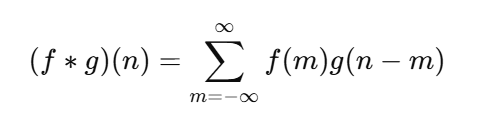
 
If a kernel is initialized on the image with specific weights, they can  linearly transform input image and find various patterns. For exmaple, there would some kernels that detect edges present in the image. 

In a CNN, each convolutional layer can have multiple kernels, and thereby can generate multiple feature maps that detect patterns such as horizontal lines, vertical lines and edges/corners. 
First layer: y 1=W 1x+b 1(Linear transformation)
Second layer:y 2=W 2y1+b2(Another linear transformation)
Output layer: 
𝑦3=𝑊3𝑦2+𝑏3(Final linear transformation)

But, the output y3 is just a linear transformation of input image and the output can only represent linear patterns represent of the input. Inorder, to classify the images and identity decision boundaries it is very important to also indentify more complex non-linear patterns of input image.So, an non-linear activation is preferred to classify the image. As per the universal approximation theorem its only possible to approximate a continuous function f(x) defined on a compact subset of a real-valued space, with non-linear activation functions to achieve good level of accuracy. This allows the neural network with at atleast single hidden layer and non-activation functions to act as universal approximators.

Significance of CNN/deep neural networks:
So,a neural network trained on large amounts of data with many layers, which includes series of non-linear convolutional operatins acts as universal approximators.This resulted to the idea of Transfer learning, which can be very helpful to identify patterns and detect objects in a random image.

Max-pooling: 
Max-pooling downsizes the feature map generated by the previous covolutional layer by reducing spatialdimensions(height and width) of the feature map. The primary goal of max-pooling layer in CNN is to detect high-level features with as low as possible spatial resolution.

 In max-pooling,a window(usually of shape 2x2 and 3x3) slides over the feature map of previous convolutional layer.At each position of the sliding window, the maximum value that window is selected and passed as the output in the new feature map.Later,kernel shifts over the feature map with strides.
 As a result, the output feature map has reduced dimensions, but retains the important features from the original feature map This helps in maintaining the most prominent patterns from the image while reducing spatial resolution.Also, by selecting the maximum value makes the neural network more invariant to small transitions or shifts in the image.
 

Resnet-50 refers to Residual network with 50 layers. Residual networks is a deep neural networks designed to solve vanishing gradients and improve performance in very deep neural networs. 

Vanishing gradient problem: During the back propagation, the gradients of the loss functtion w.r.t hidden and vanishes by the time it reaches input layer resulting in very small updation of weights to the model.
Solution for vanishing gradient descent:
RELU helps to resolve this because it prevents the derivative is 1. This helps to solve the non-linearity present.

Batch normalization: Normalizing the inputs at each layer can keep the activations in a reasonable range,avoiding the shrink too much.

3->6-5>16-5>


    Ex code of  CNN:
    Class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolution layer consists of 3 input channels, 6 output channel. Simailarly,5 convolutional filters are present
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        # 2nd Convolutional layer consists of 6 input channels and 16 output channels. Similarly, 5 convolutional layers are present.
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Fully convolutional layers are formed by flattening the convolutional layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()




deep neural networks,like CNN,were mostly used to understand high/low/mid level features. But,primary obstacle in deep neural neural networks is vanishing gradient problem, which would nullify the gradients making the neural networks difficult to learn as more deep layers are introduced. This problem has been addressed using normalized initialization and intermediate normalization layers.By normalizing the layers,layers converge to start converging during backpropagation. However, adding more layers is also leading to accuracy degradation problem after a certain accuracy.

Residual learning:

Residual learning framework is introduced to solve these problems,bothe vanishing and degradation problem, by optimizing the difference/residuals between the output and input i.e; F(x) :=H(x)-x,instead of F(x)+x=H(x) compared to original mapping as in feed forward neural networks.

Inotherwords, the input x is added directly to the outputs of stacked layers by skipping intermediate layers. These connection known as "shortcut connections". Such a framework would reduce the computational complexity during SGD optimization with back propagation.
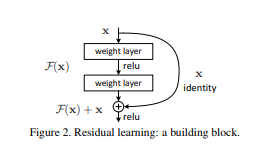


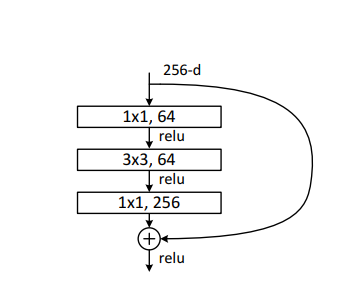

Fig: Bottleneck Block design for Resnet-50.


Plain network: 
The convolutional layers have 3x3 filters and follow 2 simple rules:
i. for same output feature size number of filters must be the same.
ii. if the feature map size is halved, the number of filters is doubled so as to preserve the time complexity per layer. Downsampling of convolutional layers is performed with the stride of 2. The network ends with global average pooling later and a 1000 way FC layer with softmax. The total number of weighed layers is 34.

Residual net:
Inaddition to plain net, shortcut connections are introduced.
Identity shortcuts: When the input and output dimensions are the same, the skip connection is just an identity mapping.This means that input is simply added directly to the output without any transformation.

Projection shortcuts: The projection shortcut helps ensure that the residual connection can be applied correctly even when the dimensions of the input and output differ.
When the input and output have different dimensions, a 1x1 convolution (with or without a stride) is used to match the input and output dimensions, allowing the skip connection to work.

Implementation(of resnet paper)
A 224×224 crop is randomly sampled from an image or its
horizontal flip, with the per-pixel mean subtracted [21].

The standard color augmentation in [21] is used.

We adopt batch
normalization (BN) [16] right after each convolution and
before activation, following [16].

We initialize the weights
as in [13] and train all plain/residual nets from scratch. We
use SGD with a mini-batch size of 256. 

. The learning rate
starts from 0.1 and is divided by 10 when the error plateaus,
and the models are trained for up to 60 × 104 iterations. 

We use a weight decay of 0.0001 and a momentum of 0.9. We
do not use dropout [14], following the practice in [16].


The key idea behing Resnet is the concept of residual learning. Instead of directly mapping input x and output y. Resnet learns residual mapping F(x)=y-x i.e; the difference between the desired output and input. The Resnet learns to predict this residual function. 
Residual block is the building block of Resnet and have 2 components:
Convolutional Layers: A set of convolutional operations is performed on the input 𝑋
This usually involves a series of two or more convolutional layers. Each convolutional layer typically follows the sequence:

Convolution: Applies a filter to the input feature map to extract features.

Batch Normalization: Normalizes the activations in the feature map to stabilize training.

ReLU Activation: A non-linear activation function (ReLU) is applied to introduce non-linearity.

Skip-connection: Skip connection, bypasses one or more layers and adds the input to the output of the block. Instead of passing the information through a sequence of transformations,Resnet adds the input of a layer to its output. This is called Residual connection.
Such connection would allow the model to learn by reducing the occurance of vanishing gradients.
During the skip connection,the original input(X) is added to the output of the convoutional later F(X).
            ![image.png](attachment:image.png)

After adding the skip connection another activation function like RELU is applied to the result.
            ![image-2.png](attachment:image-2.png)

In [60]:
from PIL import Image
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import KFold
torch.manual_seed(42)

In [ ]:
train_data_path=os.path.join(os.getcwd(),"..","train_data")
test_data_path=os.path.join(os.getcwd(),"..","test_data")

# transform pipeline that converts the PIL images back to tensors
transform = transforms.Compose([
    transforms.ToTensor()])

#Loading the train and test data
train_data=ImageFolder(train_data_path, transform=transform)
test_data=ImageFolder(test_data_path, transform=transform)

# Creating  train(shuffled) and test dataloaders for training and test sets
train_batch_loader=DataLoader(train_data,batch_size=32,shuffle=True)
test_batch_loader=DataLoader(test_data,batch_size=32,shuffle=False)

In [5]:
len(test_batch_loader.dataset)

1525

In [6]:
len(train_batch_loader.dataset)

6083

Implemented architecture:
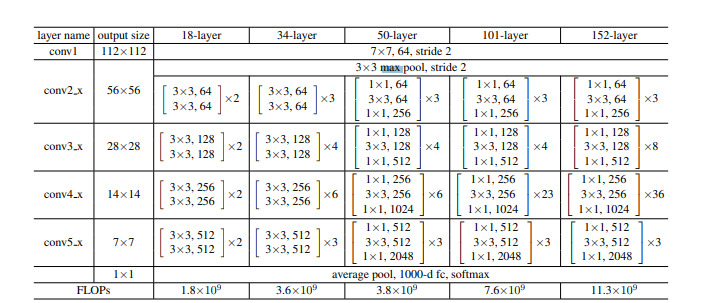






padding 1 is typically chosen based on the desired output dimensions of the convolutional layers.

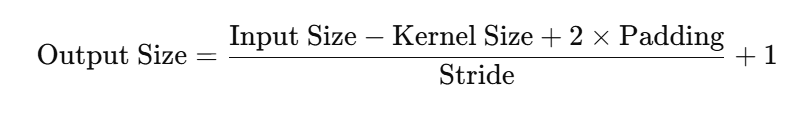





In [43]:
class BottleneckBlock(nn.Module):
    
    expansion=4 # Definity expansion as class level attribute of bottle neck class

    def __init__(self, in_channels, out_channels, stride=1,downsample=None):
        super().__init__()
        # defining first convolution 1x1 kernel to reduce channels
        self.conv1=nn.Conv2d(in_channels,
                             out_channels,
                             kernel_size=1,
                             bias=False) # stride=1 is default
        self.batch_norm1=nn.BatchNorm2d(out_channels)
        
        # defining second convolution 3x3 kernel processes the feature maps.
        self.conv2=nn.Conv2d(out_channels,
                             out_channels,
                             kernel_size=3,
                             stride=stride,
                             padding=1,
                             bias=False) 
        self.batch_norm2=nn.BatchNorm2d(out_channels)
        
        # defining third convolution(1x1) to expand channels
        self.conv3=nn.Conv2d(out_channels,
                             out_channels*self.expansion,
                             kernel_size=1,
                             bias=False)
        self.batch_norm3=nn.BatchNorm2d(out_channels* self.expansion)

        # defining downsample
        self.downsample = downsample
        # defining relu
        self.relu = nn.ReLU(inplace=True)

    def forward(self,x):
        identity=x  # Input to each bootleneck block 

        out=self.conv1(x)
        out=self.batch_norm1(out)
        out=self.relu(out)

        out=self.conv2(out)
        out=self.batch_norm2(out)
        out=self.relu(out)

        out=self.conv3(out)
        out=self.batch_norm3(out)

        if self.downsample is not None:
            identity=self.downsample(x)
        
        out+=identity # Adding skip connection to the input, through identity mapping
        out=self.relu(out)

        return out

In [ ]:
class SimplifiedResnet50(nn.Module):
    def __init__(self,num_classes=10):
        super().__init__()
        # Initializig the input channels
        self.in_channels=64

        # Initial layer of 64 output channels with 7x7 kernel and stride 2. 
        self.conv1=nn.Conv2d(3,64,
                             kernel_size=7,
                             stride=2,
                             padding=3,
                             bias=False)
        # Batch normalizing the output channels of conv1
        self.batch_norm1=nn.BatchNorm2d(64)
        # Applying the ReLU, to introduce non-linearity  to convoluted output
        self.relu=nn.ReLU(inplace=True)
        #
        self.maxpool=nn.MaxPool2d(kernel_size=3,
                                  stride=2,
                                  padding=1)
        # Creating residual layers and initializing them
        self.res_layer1=self.residual_layer(64,3) # 3 blocks of Bottleneck with 64 output channels and stride 1
        self.res_layer2=self.residual_layer(128,4,stride=2) # 4 blocks of Bottleneck with 128 output channels and stride 2
        self.res_layer3=self.residual_layer(256,6,stride=2)# 6 blocks of Bottleneck with 256 output channels and stride 2
        self.res_layer4=self.residual_layer(512,3,stride=2)# 3 blocks of Bottleneck with 512 output channels and stride 2

        # Final layers: Average pooling 
        self.avgpool=nn.AdaptiveAvgPool2d((1,1))
        self.fc=nn.Linear(512*BottleneckBlock.expansion,num_classes)
    
    def residual_layer(self,out_channels,blocks,stride=1):
        # Renewing the downsample to None each time 
        downsample=None
        # Initializing to downsample if the output channels is not equal to input channels and stride=1
        if stride!=1 or self.in_channels!=out_channels*BottleneckBlock.expansion:
            downsample=nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels*BottleneckBlock.expansion,
                          kernel_size=1,stride=stride,bias=False),
                nn.BatchNorm2d(out_channels*BottleneckBlock.expansion))

        # Renewing every residual layer and appending the set of bottlenecks
        residual_layers=[]
        residual_layers.append(BottleneckBlock(self.in_channels,
                                      out_channels,
                                      stride,
                                      downsample))
        
        # Updating input channels for the next residual layer by multiplying the outchannels by the exanpansion factor 4 for resnet-50
        self.in_channels=out_channels*BottleneckBlock.expansion
        
        # Appending the bootleneck block to form residual layer
        for _ in range(1,blocks):
            residual_layers.append(BottleneckBlock(
                self.in_channels,
                out_channels))
        
        return nn.Sequential(*residual_layers)
    
    def forward(self,x):
        print(f"Input shape to model: {x.shape}")
        x=self.conv1(x)
        print(f"Shape after conv1: {x.shape}")

        x=self.batch_norm1(x)
        x=self.relu(x)
        x=self.maxpool(x)
        print(f"Shape after maxpool: {x.shape}")

        x=self.res_layer1(x)
        print(f"Shape after residual layer1: {x.shape}")

        x=self.res_layer2(x)
        print(f"Shape after residual layer2: {x.shape}")

        x=self.res_layer3(x)
        print(f"Shape after residual layer3:{x.shape}")

        x=self.res_layer4(x)
        print(f"Shape after residual layer3:{x.shape}")

        x=self.avgpool(x)
        print(f"Shape after avgpool: {x.shape}")
        x=torch.flatten(x,1)
        print(f"Shape after flattening layer: {x.shape}")

        x=self.fc(x)
        print(f"Shape after fully connected layer: {x.shape}")
        return x

In [58]:
def initialize_model(learning_rate=0.01):
    model = SimplifiedResnet50(num_classes=10)
    criterion = nn.CrossEntropyLoss()  
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    return model, criterion, optimizer

In [65]:
example_input = torch.randn(1, 3, 224, 224)

model = SimplifiedResnet50(num_classes=10)

output = model(example_input)
output.data

Input shape to model: torch.Size([1, 3, 224, 224])
Shape after conv1: torch.Size([1, 64, 112, 112])
Shape after maxpool: torch.Size([1, 64, 56, 56])
Shape after residual layer1: torch.Size([1, 256, 56, 56])
Shape after reslidual layer2: torch.Size([1, 512, 28, 28])
Shape after residual layer3:torch.Size([1, 1024, 14, 14])
Shape after residual layer3:torch.Size([1, 2048, 7, 7])
Shape after avgpool: torch.Size([1, 2048, 1, 1])
Shape after flattening layer: torch.Size([1, 2048])
Shape after fully connected layer: torch.Size([1, 10])


tensor([[ 0.0423,  0.9424, -0.3680,  0.4165, -0.3068, -0.9660, -0.3877,  0.6596,
         -0.4408, -0.6406]])

In [ ]:
torch.max(output.data,1)




torch.return_types.max(
values=tensor([0.9424]),
indices=tensor([1]))